In [1]:
# we attempt to do unsupervised analysis.
# so we cannot ensure which class is positive Therefore for accuracy if it's lower or higer all are good sign.
#But if it's close to 0.5, it means bad. 


In [ ]:
import pickle
test = open("token_length.pickle","rb")
token_length = pickle.load(test)

test = open("embeddings_vectors_elmo.pickle","rb")
embeddings_vectors = pickle.load(test)

test = open("label.pickle","rb")
label = pickle.load(test)

test = open("maxout_elmo.pickle","rb")
maxout_elmo = pickle.load(test)

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

data = maxout_elmo

pca = PCA(n_components=5)
pca.fit(data)
result_pca = pca.transform(maxout_elmo).tolist()

tsne = TSNE(n_components=2, random_state=0, perplexity=15)
result_tsnm = tsne.fit_transform(pd.DataFrame(maxout_elmo)).astype('double').tolist()

/home/tan525/miniconda3/testpytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tan525/miniconda3/testpytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [3]:

color = []
for tmp in label:
    if tmp == "neutral":
        color.append("Blue")
    elif tmp == 0:
        color.append("Red")
    elif tmp == 4:
        color.append("Green")


In [4]:
tring = result_tsnm
tring = pd.DataFrame(tring)
model2 = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=tring.astype('double'))
test1 = np.array(tring)
predict = model2.predict(test1)


In [5]:


y = []
for i in range(0,len(np.array(label))):
    if label[i] == 0: 
        y.append("positive") 
    if label[i] == 4:
        y.append("negative") 
        

y_p = []
for i in range(0,len(predict)):
    if predict[i] == 0: 
        y_p.append("positive") 
    if predict[i] == 1:
        y_p.append("negative") 
print("accuracy: ",accuracy_score(y,y_p))

accuracy:  0.501413881748072


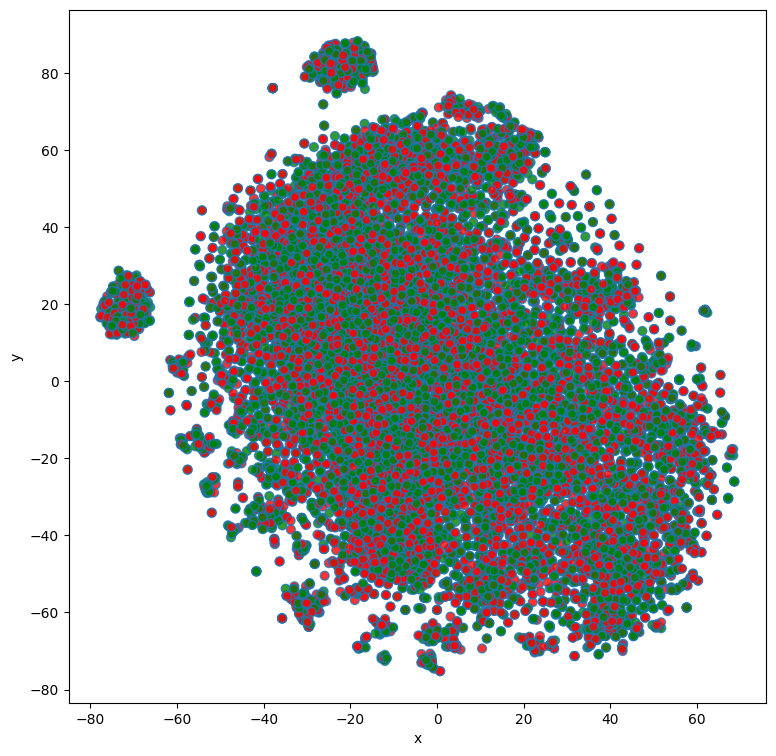

In [6]:

        

accuracy_score(y,y_p)

result_tsnm = np.array(tring)
df = pd.DataFrame({'x': [x for x in result_tsnm[:, 0]],
                       'y': [y for y in result_tsnm[:, 1]],
                       'words': label,
                       'color': color
                       })

fig, _ = plt.subplots()
fig.set_size_inches(9, 9)
p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )


In [7]:
def get_trainandtest(data,label):
    train = data[25:177]
    train_l = label[25:177]

    test1 = data[:25]
    test1_l = label[:25]
    test2 = data[-25:]
    test2_l = label[-25:]
    test = test1 + test2 
    test_l = test1_l + test2_l  
    return train,train_l,test,test_l

train,train_l,test,test_l = get_trainandtest(maxout_elmo,label)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



def showsimpleclass(test,test_l,train,train_l):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(train, train_l)
    y_predi1 = neigh.predict(test).tolist()
    print("====================KN=========================")
    print("accuracy_score: ",round(accuracy_score(test_l,y_predi1),2))
    print("precision_score: ",round(precision_score(test_l,y_predi1, pos_label= 0),2))
    print("recall_score: ",round(recall_score(test_l,y_predi1,pos_label=0),2))
    print("f1_score: ",round(f1_score(test_l,y_predi1,pos_label=0),2))

    print("====================NLP=========================")
    MLP = MLPClassifier(random_state=3, max_iter=30000)
    MLP.fit(train, train_l)
    y_predi1 = MLP.predict(test)
    print("accuracy_score: ",round(accuracy_score(test_l,y_predi1),2))
    print("precision_score: ",round(precision_score(test_l,y_predi1, pos_label= 0),2))
    print("recall_score: ",round(recall_score(test_l,y_predi1,pos_label=0),2))
    print("f1_score: ",round(f1_score(test_l,y_predi1,pos_label=0),2))
    print("====================ADA=========================")
    AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
    AdaBoost.fit(train, train_l)
    y_predi1 = AdaBoost.predict(test)
    print("accuracy_score: ",round(accuracy_score(test_l,y_predi1),2))
    print("precision_score: ",round(precision_score(test_l,y_predi1, pos_label= 0),2))
    print("recall_score: ",round(recall_score(test_l,y_predi1,pos_label=0),2))
    print("f1_score: ",round(f1_score(test_l,y_predi1,pos_label=0),2))
    
    print("====================SVC=========================")
    svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    svc.fit(train, train_l)
    y_predi1 = svc.predict(test)
    svc.fit(train, train_l)
    print("accuracy_score: ",round(accuracy_score(test_l,y_predi1),2))
    print("recall_score: ",round(precision_score(test_l,y_predi1, pos_label= 0),2))
    print("recall_score: ",round(recall_score(test_l,y_predi1,pos_label=0),2))
    print("f1_score: ",round(f1_score(test_l,y_predi1,pos_label=0),2))
showsimpleclass(test,test_l,train,train_l)

====================KN=========================
accuracy_score:  0.44
precision_score:  0.55
recall_score:  0.37
f1_score:  0.44
====================NLP=========================
accuracy_score:  0.42
precision_score:  0.52
recall_score:  0.53
f1_score:  0.52
====================ADA=========================
accuracy_score:  0.48
precision_score:  0.57
recall_score:  0.57
f1_score:  0.57
====================SVC=========================
accuracy_score:  0.32
recall_score:  0.42
recall_score:  0.33
f1_score:  0.63


In [10]:
def get_defined_vectors_from_padded(token_length,embeddings_vectors):
    wordvect = []
    for i in  range(0,len(token_length)):
        tmp = []
        for pos in range(0,token_length[i]):
            tmp.append(embeddings_vectors[i][pos])
        wordvect.append(tmp)
    return wordvect

effect_vectors = get_defined_vectors_from_padded(token_length, embeddings_vectors)
    

import pandas as pd
negative_v = []  
positive_v = []
for i in label:
    if i == 0:
        for vec in effect_vectors[i]:
            positive_v.append(vec)   
    else:
        for vec in effect_vectors[i]:
            negative_v.append(vec)
       
        
import numpy as np

negative_v = np.array(negative_v)
positive_v = np.array(positive_v)

positive_center = np.zeros(positive_v[0].shape)
negative_center = np.zeros(positive_v[0].shape)
for v in positive_v:
    positive_center = positive_center + v
positive_center = positive_center/positive_v.shape[0]

for v in negative_v:
    negative_center = negative_center + v
negative_center = negative_center/negative_v.shape[0]



    

from numpy.linalg import norm
def cosine_similarity(A,B):
    return np.dot(A,B)/(norm(A)*norm(B))


def get_ratio(center1,center2,vectors):
    ratio = []
    coff1 = []
    summary = 0
    tmp = 0
    for vec in vectors:
        tmp = cosine_similarity(center1, np.array(vec)) - cosine_similarity(center2, np.array(vec))
        coff1.append(tmp)
        summary = summary + abs(tmp)
        ratio.append(tmp)
    ratio = ratio/summary
    return ratio, coff1


score = []
coff1 = []
i = 0
for sequence in effect_vectors:
    i += 1   
    ratio, coff = get_ratio(positive_center, negative_center, sequence)
    score.append(ratio)
    coff1.append(sum(coff))
    
predict = [0 if i > 0 else 4 for i in coff1]




In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
(1-accuracy_score(label, predict))

0.5037275064267352